# Proyek Analisis Data: Bike Sharing

- **Nama:** Sahrul Hidayat
- **Email:** sahrulhint@gmail.com
- **ID Dicoding:** sahrulhidayat

## Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir di tahun 2012?
- Jam berapa biasanya paling banyak dan paling sedikit orang yang menyewa sepeda?
- Hari apa saja yang paling banyak orang menyewa sepeda?
- Bagaimana situasi cuaca yang paling digemari untuk menyewa sepeda?

## Menyiapkan Library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data dari **day.csv** dan **hour.csv** memiliki kolom-kolom yang sama, kecuali kolom **hr** yang tidak ada pada **day.csv**
- Data dari **day.csv** merekam data peminjaman sepeda setiap hari sedangkan **hour.csv** merekam data peminjaman sepeda setiap jam

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Semua tipe data sudah sesuai
- Data Bike Sharing tidak memiliki data duplikasi, missing value, atau innacurate

## Exploratory Data Analysis (EDA)

### Explore

In [11]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
181,182,2011-07-01,3,0,7,0,5,1,1,0.722500,0.652162,0.396250,0.102608,1246,4116,5362
494,495,2012-05-09,2,1,5,0,3,1,2,0.575000,0.553025,0.744167,0.216412,620,4097,4717
207,208,2011-07-27,3,0,7,0,3,1,1,0.775000,0.690667,0.402917,0.183463,755,3901,4656
31,32,2011-02-01,1,0,2,0,2,1,2,0.192174,0.234530,0.829565,0.053213,47,1313,1360
138,139,2011-05-19,2,0,5,0,4,1,2,0.530833,0.510742,0.829583,0.108213,735,3840,4575
475,476,2012-04-20,2,1,4,0,5,1,1,0.526667,0.515775,0.694583,0.149871,1340,5950,7290
545,546,2012-06-29,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417,829,4634,5463
245,246,2011-09-03,3,0,9,0,6,0,1,0.669167,0.633213,0.716667,0.185325,1935,2549,4484
424,425,2012-02-29,1,1,2,0,3,1,2,0.344348,0.348470,0.804783,0.179117,65,1769,1834
363,364,2011-12-30,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999


In [12]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [13]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7625,7626,2011-11-19,4,0,11,8,0,6,0,1,0.26,0.2424,0.56,0.2537,12,80,92
15557,15558,2012-10-15,4,1,10,10,0,1,1,2,0.60,0.5909,0.73,0.3881,43,125,168
9828,9829,2012-02-19,1,1,2,11,0,0,0,2,0.26,0.2273,0.56,0.3284,82,144,226
13582,13583,2012-07-25,3,1,7,3,0,3,1,1,0.66,0.6212,0.65,0.2239,1,11,12
15789,15790,2012-10-25,4,1,10,2,0,4,1,1,0.54,0.5152,0.77,0.0000,3,15,18
740,741,2011-02-03,1,0,2,6,0,4,1,1,0.16,0.1364,0.43,0.3582,0,39,39
3547,3548,2011-06-01,2,0,6,17,0,3,1,1,0.86,0.8030,0.47,0.2985,52,434,486
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14
8666,8667,2012-01-01,1,1,1,21,0,0,0,2,0.44,0.4394,0.67,0.2537,10,61,71
16371,16372,2012-11-19,4,1,11,21,0,1,1,2,0.38,0.3939,0.54,0.2239,15,188,203


In [14]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [15]:
def number_to_hour(num):
    hours = [dt.time(i).strftime('%H:%M') for i in range(0, 24)]
    return hours[num]
hour_df["hour"] = hour_df["hr"].apply(number_to_hour)

hour_df.groupby(by="hour").cnt.max().sort_values(ascending=False)

hour
18:00    977
17:00    976
08:00    839
16:00    783
12:00    776
13:00    760
14:00    750
15:00    750
19:00    743
11:00    663
07:00    596
21:00    584
20:00    567
10:00    539
22:00    502
09:00    426
00:00    283
23:00    256
06:00    213
01:00    168
02:00    132
03:00     79
05:00     66
04:00     28
Name: cnt, dtype: int64

**Insight:**
- Orang-orang menyewa sepeda paling banyak adalah atau jam 18:00 dan paling sedikit adalah jam 04:00

In [16]:
def number_to_day(num):
    days = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
    return days[num]
day_df["dayname"] = day_df["weekday"].apply(number_to_day)

day_df.groupby(by="dayname").cnt.max().sort_values(ascending=False)

dayname
Minggu    8714
Sabtu     8362
Senin     8227
Kamis     8173
Jumat     7804
Rabu      7767
Selasa    7525
Name: cnt, dtype: int64

**Insight:**
- Orang-orang menyewa sepeda paling banyak adalah hari Minggu dan paling sedikit hari Selasa

In [17]:
def number_to_weather(num):
    weathers = ["","Cerah, Berawan", "Berkabut", "Hujan, Salju", "Badai"]
    return weathers[num]
day_df["weather"] = day_df["weathersit"].apply(number_to_weather)

day_df.groupby(by="weather").cnt.max().sort_values(ascending=False)

weather
Cerah, Berawan    8714
Berkabut          8362
Hujan, Salju      4639
Name: cnt, dtype: int64

**Insight:**
- Orang-orang menyewa sepeda paling banyak pada saat cuaca Cerah atau Berawan, ketika cuaca Berkabut penyewa sepeda sedikit berkurang

In [18]:
def number_to_season(num):
    seasons = ["", "Spring", "Summer", "Fall", "Winter"]
    return seasons[num]

day_df["season_name"] = day_df["season"].apply(number_to_season)

day_df.rename(columns={"cnt": "user_count"}, inplace=True)
day_df.groupby(by="season_name").agg({
    "casual": "sum",
    "registered": "sum",
    "user_count": "sum"
})

,casual,registered,user_count
season_name,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


**Insight:**
- Orang-orang menyewa sepeda paling banyak pada musim gugur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir di tahun 2012?

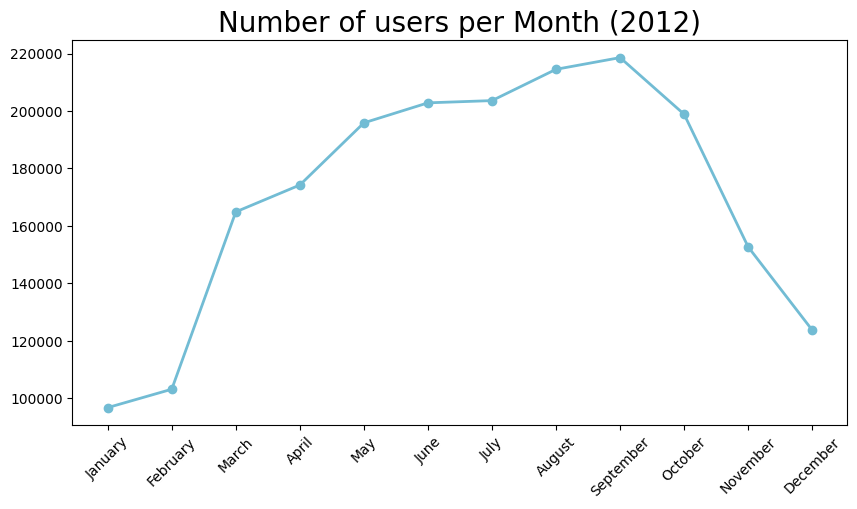

In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday']) 
monthly_users_df = day_df.resample(rule='ME', on='dteday').agg({
    "user_count": "sum"
})

monthly_users_df.index = monthly_users_df.index.strftime('%B')
monthly_users_df = monthly_users_df.reset_index()
monthly_users_df = monthly_users_df.iloc[len(monthly_users_df) // 2:]

plt.figure(figsize=(10, 5)) 
plt.plot(monthly_users_df["dteday"], monthly_users_df["user_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of users per Month (2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10) 
plt.show()

### Pertanyaan 2: Jam berapa biasanya paling banyak dan paling sedikit orang yang menyewa sepeda?

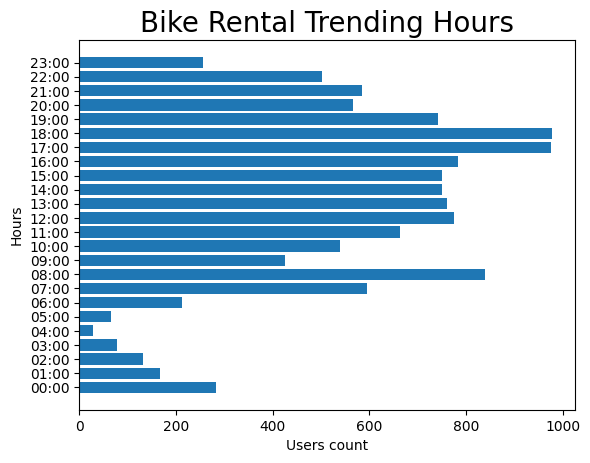

In [20]:
plt.barh(y=hour_df["hour"], width=hour_df["cnt"])
plt.xlabel("Users count")
plt.ylabel("Hours")
plt.title("Bike Rental Trending Hours", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.show()

### Pertanyaan 3: Hari apa saja yang paling banyak orang menyewa sepeda?

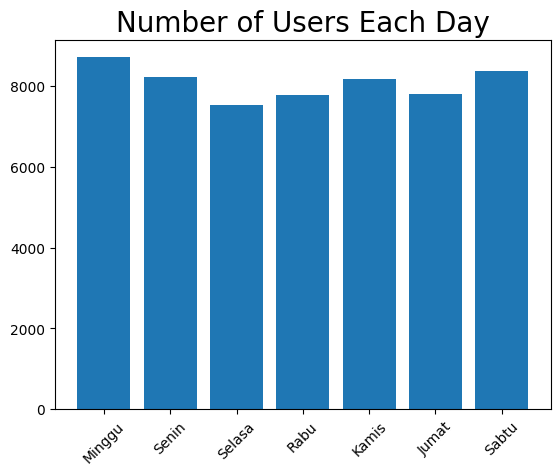

In [21]:
plt.bar(x=day_df["dayname"], height=day_df["user_count"])
plt.title("Number of Users Each Day", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45) 
plt.show()

### Pertanyaan 4: Bagaimana situasi cuaca yang paling digemari untuk menyewa sepeda?

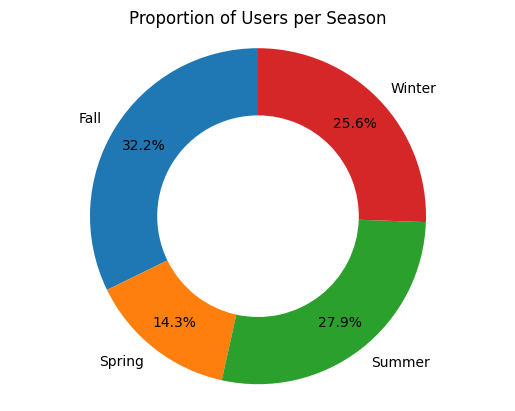

In [22]:
seasonal_max_users = day_df.groupby(by="season_name").agg({
    "casual": "sum",
    "registered": "sum",
    "user_count": "sum"
})

sizes = seasonal_max_users['user_count']
labels = seasonal_max_users.index

plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.8 , startangle=90, wedgeprops = {'width': 0.4})
plt.axis('equal')
plt.title('Proportion of Users per Season')
plt.show()

## Analisis Lanjutan
Analisis ini menggunakan teknik clustering, dimana mengelompokkan berdasarkan karakteristik suhu. Di sini, saya menggunakan metode binning untuk menentukan karakteristik suhu. Saya menganalisis bagaimana hubungan antara musim, suhu dan banyaknya penyewa sepeda.

In [23]:
day_df['atemp_celcius'] = day_df['atemp']*50
bins = [0, 15, 23, 31, 41, 100]
labels = ["Sangat dingin", "Dingin", "Normal", "Hangat", "Panas"]
day_df['suhu'] = pd.cut(day_df['atemp_celcius'], bins=bins, labels=labels)
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,user_count,dayname,weather,season_name,atemp_celcius,suhu
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,...,0.434167,0.361950,54,768,822,Senin,"Cerah, Berawan",Spring,5.80875,Sangat dingin
377,378,2012-01-13,1,1,1,0,5,1,1,0.274167,...,0.507500,0.378108,174,3040,3214,Sabtu,"Cerah, Berawan",Spring,12.46810,Sangat dingin
638,639,2012-09-30,4,1,9,0,0,0,1,0.526667,...,0.583333,0.134958,2015,4874,6889,Senin,"Cerah, Berawan",Winter,25.88315,Normal
263,264,2011-09-21,3,0,9,0,3,1,2,0.595000,...,0.900000,0.096404,539,3813,4352,Kamis,Berkabut,Fall,27.52665,Normal
31,32,2011-02-01,1,0,2,0,2,1,2,0.192174,...,0.829565,0.053213,47,1313,1360,Rabu,Berkabut,Spring,11.72650,Sangat dingin
238,239,2011-08-27,3,0,8,0,6,0,2,0.680000,...,0.850000,0.375617,226,889,1115,Minggu,Berkabut,Fall,31.77780,Hangat
349,350,2011-12-16,4,0,12,0,5,1,2,0.375000,...,0.500417,0.260575,178,3399,3577,Sabtu,Berkabut,Winter,17.99125,Dingin
226,227,2011-08-15,3,0,8,0,1,1,1,0.665833,...,0.712083,0.208954,775,3563,4338,Selasa,"Cerah, Berawan",Fall,30.80835,Normal
61,62,2011-03-03,1,0,3,0,4,1,1,0.198333,...,0.318333,0.225754,123,1562,1685,Jumat,"Cerah, Berawan",Spring,10.00665,Sangat dingin
707,708,2012-12-08,4,1,12,0,6,0,2,0.381667,...,0.911250,0.101379,1153,4429,5582,Minggu,Berkabut,Winter,19.47540,Dingin


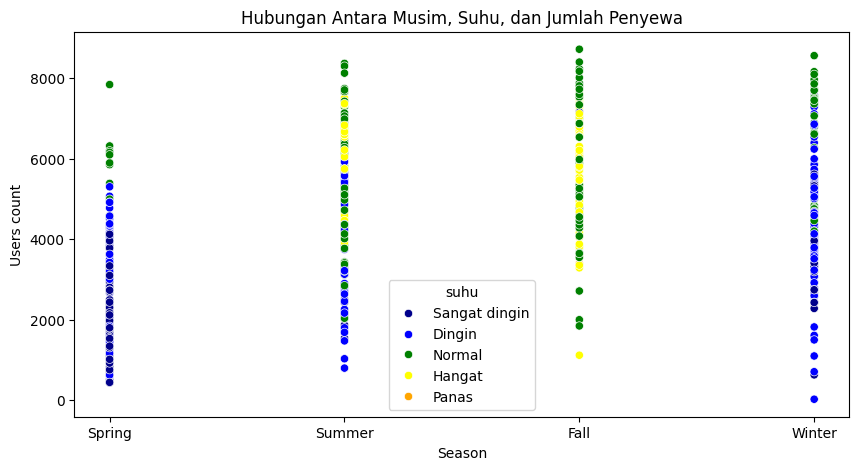

In [24]:
color_map = {
    "Sangat dingin":"darkblue", 
    "Dingin": "blue", 
    "Normal": "green", 
    "Hangat": "yellow", 
    "Panas": "orange"
}

plt.figure(figsize=(10, 5)) 
sns.scatterplot(x="season_name", y="user_count", hue="suhu", data=day_df, palette=color_map)
plt.title('Hubungan Antara Musim, Suhu, dan Jumlah Penyewa')
plt.xlabel("Season")
plt.ylabel("Users count")
plt.show()

**Insight:**
- Para penyewa cenderung untuk menghindari suhu dingin
- Pada musim gugur suhu yang terasa berkisar antara normal dan hangat, dan menjadi puncak angka penyewa

## Conclusion

- Pada tahun 2012, puncak penyewa sepeda paling banyak adalah pada bulan September
- Penyewa sepeda paling banyak pada jam 18:00 dan paling sedikit pada jam 04:00
- Hari yang digemari penyewa sepeda adalah hari Sabtu dan Minggu dan paling sedikit hari Selasa tapi tidak terlalu beda jauh
- Persentase penyewa sepeda paling banyak pada musim gugur dan paling sedikit di musim semi
- Para penyewa cenderung untuk menghindari suhu dingin
- Pada musim gugur suhu yang terasa berkisar antara normal dan hangat, dan menjadi puncak angka penyewa